In [1]:
%pip install torch

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install numpy


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install torchvision


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
%pip install matplotlib


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision.transforms import v2
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
if torch.cuda.is_available():
  device = torch.device('cuda')
  print('Работаем на GPU')
else:
  device = torch.device('cpu')
  print('Работаем на CPU')

Работаем на CPU


In [3]:
!pip install timm


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import timm

c:\Users\admin1\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# вывод списка моделей содержащих *resnet* и предобученных
timm.list_models("*resnet*", pretrained=True)

['cspresnet50.ra_in1k',
 'eca_resnet33ts.ra2_in1k',
 'ecaresnet26t.ra2_in1k',
 'ecaresnet50d.miil_in1k',
 'ecaresnet50d_pruned.miil_in1k',
 'ecaresnet50t.a1_in1k',
 'ecaresnet50t.a2_in1k',
 'ecaresnet50t.a3_in1k',
 'ecaresnet50t.ra2_in1k',
 'ecaresnet101d.miil_in1k',
 'ecaresnet101d_pruned.miil_in1k',
 'ecaresnet269d.ra2_in1k',
 'ecaresnetlight.miil_in1k',
 'gcresnet33ts.ra2_in1k',
 'gcresnet50t.ra2_in1k',
 'inception_resnet_v2.tf_ens_adv_in1k',
 'inception_resnet_v2.tf_in1k',
 'lambda_resnet26rpt_256.c1_in1k',
 'lambda_resnet26t.c1_in1k',
 'lambda_resnet50ts.a1h_in1k',
 'legacy_seresnet18.in1k',
 'legacy_seresnet34.in1k',
 'legacy_seresnet50.in1k',
 'legacy_seresnet101.in1k',
 'legacy_seresnet152.in1k',
 'nf_resnet50.ra2_in1k',
 'resnet10t.c3_in1k',
 'resnet14t.c3_in1k',
 'resnet18.a1_in1k',
 'resnet18.a2_in1k',
 'resnet18.a3_in1k',
 'resnet18.fb_ssl_yfcc100m_ft_in1k',
 'resnet18.fb_swsl_ig1b_ft_in1k',
 'resnet18.gluon_in1k',
 'resnet18.tv_in1k',
 'resnet18d.ra2_in1k',
 'resnet18d.ra4

In [6]:
pretrained_model = timm.create_model('resnet50.a1_in1k', pretrained=True)

In [7]:
# Вывод архитектуры модели
print(pretrained_model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (drop_block): Identity()
      (act2): ReLU(inplace=True)
      (aa): Identity()
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     

In [8]:
transforms_stats = v2.Compose([
    torchvision.transforms.RandomResizedCrop(224),  # Случайное кадрирование до 224x224
    torchvision.transforms.RandomHorizontalFlip(), # Случайное горизонтальное отражение
	torchvision.transforms.ToTensor()             # Преобразование изображения в тензор
])

stats_dataset = ImageFolder(root="./animal_data/animal_dataset/train", transform=transforms_stats)

In [9]:
imgs = [item[0] for item in stats_dataset]
imgs = torch.stack(imgs, dim=0).numpy()

mean_r = imgs[:,0,:,:].mean()
mean_g = imgs[:,1,:,:].mean()
mean_b = imgs[:,2,:,:].mean()
print(f"Means R, G, B: {mean_r,mean_g,mean_b}")

std_r = imgs[:,0,:,:].std()
std_g = imgs[:,1,:,:].std()
std_b = imgs[:,2,:,:].std()
print(f"Std R, G, B: {std_r,std_g,std_b}")

c:\Users\admin1\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Means R, G, B: (0.5171709, 0.48619273, 0.4214712)
Std R, G, B: (0.27068973, 0.26490247, 0.27550444)


In [10]:
transforms_train = v2.Compose([
    torchvision.transforms.RandomResizedCrop(224),  # Случайное кадрирование до 224x224
    torchvision.transforms.RandomHorizontalFlip(), # Случайное горизонтальное отражение
	torchvision.transforms.ToTensor(),             # Преобразование изображения в тензор
	v2.Normalize(mean=[mean_r,mean_g,mean_b], std=[std_r,std_g,std_b]) # Нормализация с вычисленными средними и отклонениями
])

transforms_test = v2.Compose([
    torchvision.transforms.RandomResizedCrop(224),  # Случайное кадрирование до 224x224
    torchvision.transforms.RandomHorizontalFlip(), # Случайное горизонтальное отражение
	torchvision.transforms.ToTensor(),             # Преобразование изображения в тензор
	v2.Normalize(mean=[mean_r,mean_g,mean_b], std=[std_r,std_g,std_b]) # Нормализация с вычисленными средними и отклонениями
])

In [11]:
train_dataset = ImageFolder(
	root='./animal_data/animal_dataset/train',
	transform=transforms_train
)

test_dataset = ImageFolder(
	root='./animal_data/animal_dataset/test',
	transform=transforms_test
)

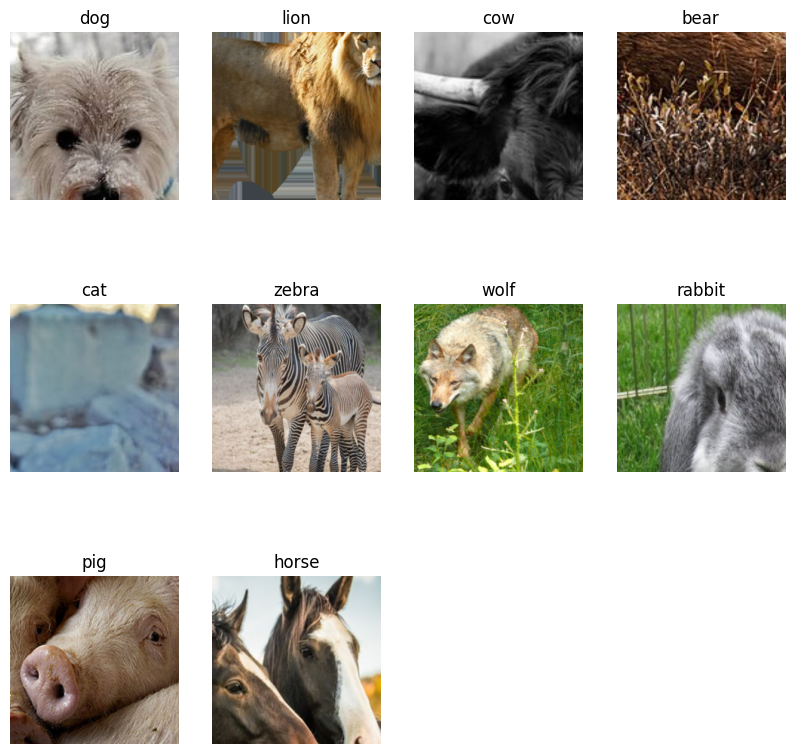

In [12]:
mean = [mean_r,mean_g,mean_b]
std = [std_r,std_g,std_b]
draw_label = []

labels_map = dict(zip(range(len(train_dataset.classes)), train_dataset.classes))
figure = plt.figure(figsize=(10, 10))
cols, rows = 4, 3
for i in range(1, 11):
	flag = 0
	while flag == 0:
		sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
		img, label = train_dataset[sample_idx]
		if label not in (draw_label):
			draw_label.append(label)
			flag = 1

	# Денормализация
	img = img.clone()
	for channel in range(3):
		img[channel] = img[channel] * std[channel] + mean[channel]

	# Переводим изображение в формат (H, W, C) для корректного отображения
	img = img.permute(1, 2, 0).numpy()

	figure.add_subplot(rows, cols, i)
	plt.title(labels_map[label])
	plt.axis("off")
	plt.imshow(img)
plt.show()

In [13]:
BATCH_SIZE = 32

train_loader = DataLoader(
	train_dataset,
	batch_size=BATCH_SIZE,
	shuffle=True
)

test_loader = DataLoader(
	test_dataset,
	batch_size=BATCH_SIZE,
	shuffle=False
)

In [14]:
# "Замораживаем" веса
for param in pretrained_model.parameters():
    param.requires_grad = False

num_classes = 10  # Количество классов в задаче

pretrained_model.fc = nn.Sequential(
    nn.Linear(pretrained_model.fc.in_features, 256),  # Промежуточный слой
    nn.ReLU(),                                       # Активация
    nn.Dropout(0.3),                                 # Dropout для регуляризации
    nn.Linear(256, num_classes)                     # Выходной слой
)

In [15]:
loss_fn = nn.CrossEntropyLoss() # Определяем функцию потерь
optimizer = torch.optim.Adam(pretrained_model.fc.parameters(), lr=0.001) # Определяем оптимизатор

In [16]:
from torch.optim import lr_scheduler

scheduler = lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)

In [17]:
# Логирование потерь для 1 этапа
train_losses_1, test_losses_1 = [], []  

In [18]:
# Логирование точности для 1 этапа
train_accuracies_1, test_accuracies_1 = [], []

In [19]:
num_epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for epoch in range(num_epochs):
    # Переключаем модель в режим обучения
    pretrained_model.train()

    # Обучение
    train_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in train_loader:
        # Перенос данных на устройство
        images, labels = images.to(device), labels.to(device)

        # Обнуляем градиенты
        optimizer.zero_grad()

        # Прямой проход
        outputs = pretrained_model(images)
        loss = loss_fn(outputs, labels)

        # Обратное распространение
        loss.backward()

        # Шаг оптимизации
        optimizer.step()

        # Накопление метрик
        train_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct_train += (preds == labels).sum().item()
        total_train += labels.size(0)

    # Вычисление средней потери и точности для обучения
    avg_train_loss = train_loss / len(train_loader)
    train_accuracy = correct_train / total_train

    # Переключаем модель в режим оценки
    pretrained_model.eval()

    # Тестирование
    test_loss = 0.0
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for images, labels in test_loader:
            # Перенос данных на устройство
            images, labels = images.to(device), labels.to(device)

            # Прямой проход
            outputs = pretrained_model(images)
            loss = loss_fn(outputs, labels)

            # Накопление метрик
            test_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct_test += (preds == labels).sum().item()
            total_test += labels.size(0)

    # Вычисление средней потери и точности для теста
    avg_test_loss = test_loss / len(test_loader)
    test_accuracy = correct_test / total_test

    # Шаг планировщика
    scheduler.step()

    train_losses_1.append(avg_train_loss)
    test_losses_1.append(avg_test_loss)

    train_accuracies_1.append(train_accuracy)
    test_accuracies_1.append(test_accuracy)

    # Вывод метрик за эпоху
    print(
        f"Epoch {epoch + 1}/{num_epochs}: "
        f"Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, "
        f"Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}"
    )

Epoch 1/10: Train Loss: 1.8282, Train Accuracy: 0.5137, Test Loss: 1.1845, Test Accuracy: 0.8797
Epoch 2/10: Train Loss: 0.9107, Train Accuracy: 0.8190, Test Loss: 0.5570, Test Accuracy: 0.9023
Epoch 3/10: Train Loss: 0.6569, Train Accuracy: 0.8539, Test Loss: 0.4437, Test Accuracy: 0.9248
Epoch 4/10: Train Loss: 0.6099, Train Accuracy: 0.8454, Test Loss: 0.3970, Test Accuracy: 0.8947
Epoch 5/10: Train Loss: 0.5254, Train Accuracy: 0.8539, Test Loss: 0.3575, Test Accuracy: 0.9135
Epoch 6/10: Train Loss: 0.4744, Train Accuracy: 0.8671, Test Loss: 0.3474, Test Accuracy: 0.9060
Epoch 7/10: Train Loss: 0.4693, Train Accuracy: 0.8812, Test Loss: 0.3792, Test Accuracy: 0.9098
Epoch 8/10: Train Loss: 0.4434, Train Accuracy: 0.8954, Test Loss: 0.3158, Test Accuracy: 0.9248
Epoch 9/10: Train Loss: 0.4403, Train Accuracy: 0.8944, Test Loss: 0.3357, Test Accuracy: 0.9135
Epoch 10/10: Train Loss: 0.4573, Train Accuracy: 0.8860, Test Loss: 0.2935, Test Accuracy: 0.9323


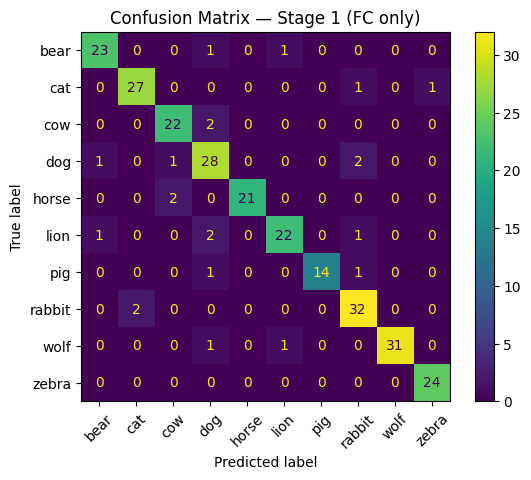

In [20]:
# 1 матрица ошибок
all_preds_1, all_labels_1 = [], []
pretrained_model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = pretrained_model(images)
        _, preds = torch.max(outputs, 1)
        all_preds_1.extend(preds.cpu().numpy())
        all_labels_1.extend(labels.numpy())

cm1 = confusion_matrix(all_labels_1, all_preds_1)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=list(labels_map.values()))
disp1.plot(xticks_rotation=45)
plt.title("Confusion Matrix — Stage 1 (FC only)")
plt.show()

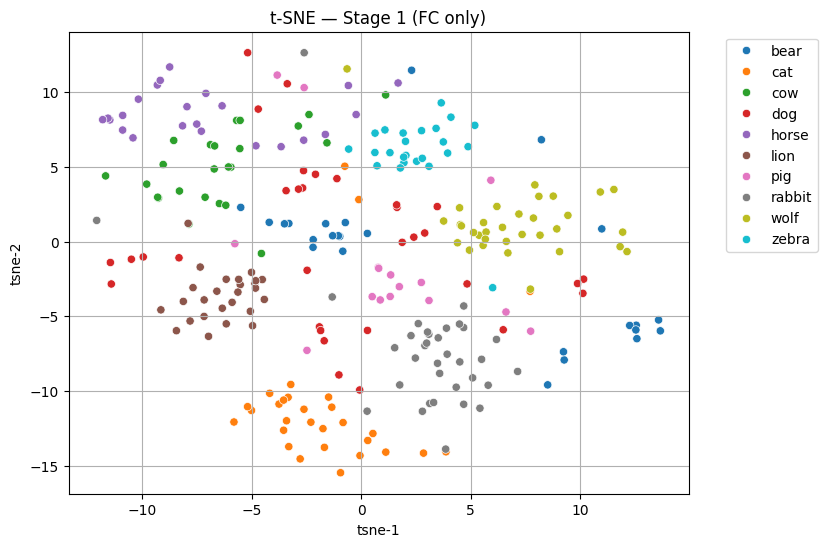

In [21]:
import torch.nn as nn

features_1, labels_1 = [], []
gap = nn.AdaptiveAvgPool2d((1, 1))  # добавим глобальный пуллинг
pretrained_model.eval()

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        feats = pretrained_model.forward_features(images)
        feats = gap(feats)  # [B, C, 1, 1]
        feats = feats.view(feats.size(0), -1)  # [B, C]
        features_1.extend(feats.cpu().numpy())
        labels_1.extend(labels.numpy())

tsne_1 = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result_1 = tsne_1.fit_transform(np.array(features_1))

df_1 = pd.DataFrame()
df_1['tsne-1'] = tsne_result_1[:, 0]
df_1['tsne-2'] = tsne_result_1[:, 1]
df_1['label'] = [labels_map[i] for i in labels_1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='tsne-1', y='tsne-2', hue='label', data=df_1, palette='tab10')
plt.title("t-SNE — Stage 1 (FC only)")
plt.legend(loc='best', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.show()


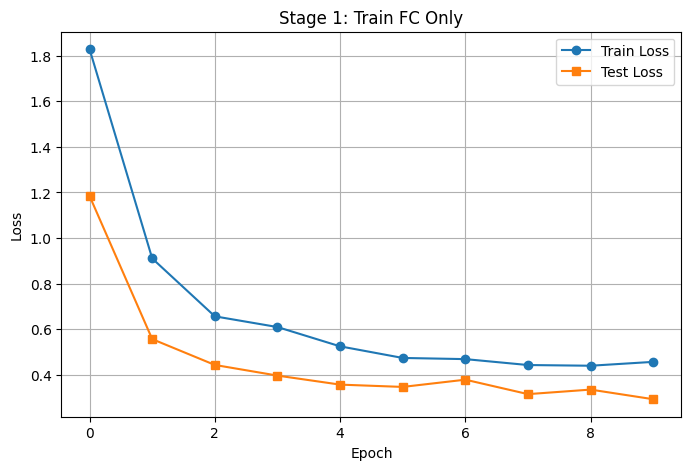

In [22]:
plt.figure(figsize=(8, 5))
plt.plot(train_losses_1, label="Train Loss", marker='o')
plt.plot(test_losses_1, label="Test Loss", marker='s')
plt.title("Stage 1: Train FC Only")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


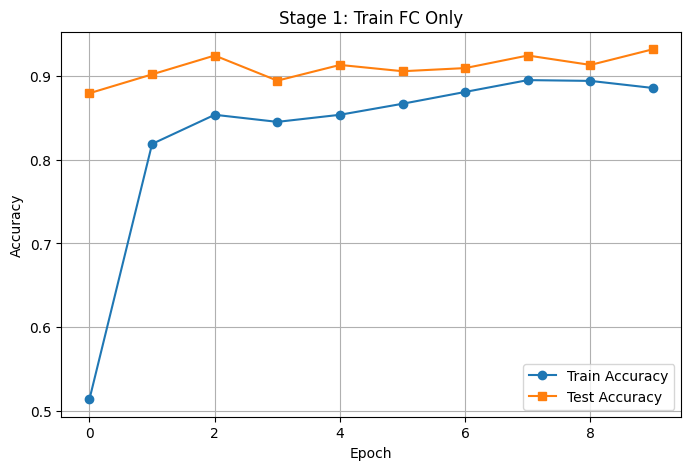

In [23]:
# Визуализация графика точности для 1
plt.figure(figsize=(8, 5))
plt.plot(train_accuracies_1, label="Train Accuracy", marker='o')
plt.plot(test_accuracies_1, label="Test Accuracy", marker='s')
plt.title("Stage 1: Train FC Only")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [24]:
n = 2
for param in pretrained_model.layer4[-n:].parameters():
    param.requires_grad = True

In [25]:
# Новый набор объектов

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD([
    {'params': pretrained_model.layer4.parameters(), 'lr': 1e-4},  # Размороженные параметры layer4
    {'params': pretrained_model.fc.parameters(), 'lr': 1e-3},     # Размороженные параметры fc
], lr=1e-2, momentum=0.9)
scheduler = lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.3)

In [26]:
# Логирование потерь для 2 этапа
train_losses_2, test_losses_2 = [], []

In [27]:
# Логирование точности для 2 этапа
train_accuracies_2, test_accuracies_2 = [], []

In [28]:
# Новый цикл обучения

for epoch in range(num_epochs):
    # Переводим модель в режим обучения
    pretrained_model.train()

    # Обучение
    train_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in train_loader:
        # Перенос данных на устройство
        images, labels = images.to(device), labels.to(device)

        # Обнуление градиентов
        optimizer.zero_grad()

        # Прямой проход
        outputs = pretrained_model(images)

        # Вычисление потерь
        loss = loss_fn(outputs, labels)

        # Обратное распространение ошибки
        loss.backward()

        # Шаг оптимизации
        optimizer.step()

        # Накопление метрик
        train_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct_train += (preds == labels).sum().item()
        total_train += labels.size(0)

    # Вычисление средней потери и точности для обучения
    avg_train_loss = train_loss / len(train_loader)
    train_accuracy = correct_train / total_train

    # Тестирование
    pretrained_model.eval()
    test_loss = 0.0
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = pretrained_model(images)
            loss = loss_fn(outputs, labels)

            test_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct_test += (preds == labels).sum().item()
            total_test += labels.size(0)

    # Вычисление средней потери и точности для теста
    avg_test_loss = test_loss / len(test_loader)
    test_accuracy = correct_test / total_test

    # Шаг планировщика
    scheduler.step()

    train_losses_2.append(avg_train_loss)
    test_losses_2.append(avg_test_loss)

    train_accuracies_2.append(train_accuracy)
    test_accuracies_2.append(test_accuracy)

        # Вывод метрик за эпоху
    print(
        f"Epoch {epoch + 1}/{num_epochs}: "
        f"Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, "
        f"Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}"
    )

c:\Users\admin1\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/10: Train Loss: 0.4321, Train Accuracy: 0.8784, Test Loss: 0.4066, Test Accuracy: 0.8684
Epoch 2/10: Train Loss: 0.4275, Train Accuracy: 0.8878, Test Loss: 0.3022, Test Accuracy: 0.9323
Epoch 3/10: Train Loss: 0.4442, Train Accuracy: 0.8775, Test Loss: 0.3013, Test Accuracy: 0.9098
Epoch 4/10: Train Loss: 0.3984, Train Accuracy: 0.8850, Test Loss: 0.3353, Test Accuracy: 0.9135
Epoch 5/10: Train Loss: 0.3992, Train Accuracy: 0.8831, Test Loss: 0.3325, Test Accuracy: 0.9098
Epoch 6/10: Train Loss: 0.4145, Train Accuracy: 0.8775, Test Loss: 0.3381, Test Accuracy: 0.9173
Epoch 7/10: Train Loss: 0.4093, Train Accuracy: 0.8897, Test Loss: 0.2822, Test Accuracy: 0.9549
Epoch 8/10: Train Loss: 0.4579, Train Accuracy: 0.8860, Test Loss: 0.3447, Test Accuracy: 0.9173
Epoch 9/10: Train Loss: 0.4278, Train Accuracy: 0.8737, Test Loss: 0.3337, Test Accuracy: 0.9060
Epoch 10/10: Train Loss: 0.4332, Train Accuracy: 0.8728, Test Loss: 0.3047, Test Accuracy: 0.9248


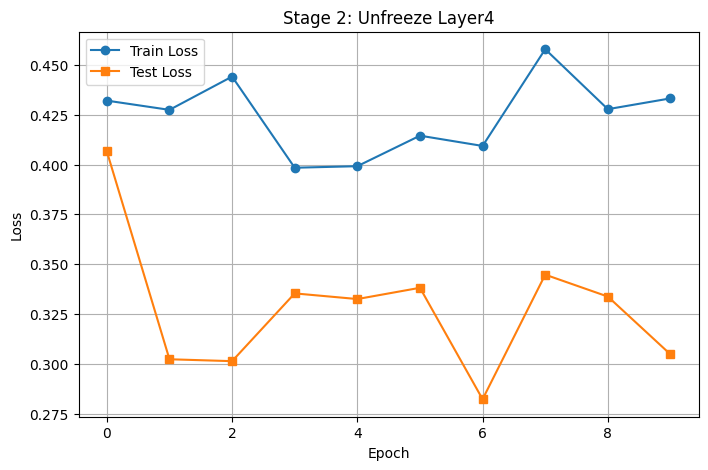

In [29]:
# Визуализация графика потерь для 2

plt.figure(figsize=(8, 5))
plt.plot(train_losses_2, label="Train Loss", marker='o')
plt.plot(test_losses_2, label="Test Loss", marker='s')
plt.title("Stage 2: Unfreeze Layer4")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


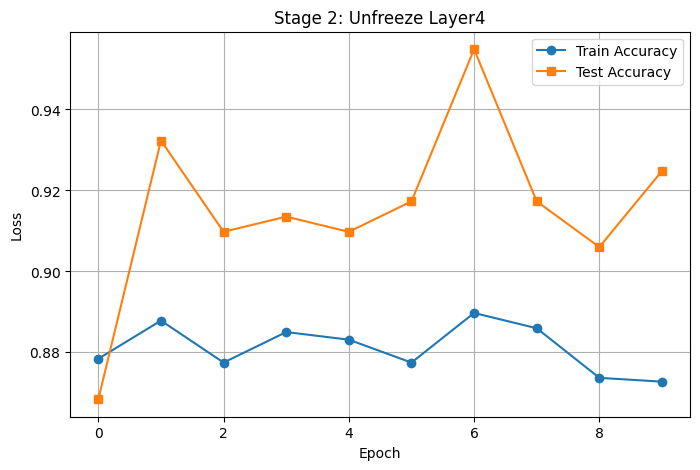

In [30]:
# Визуализация графика точности для 2

plt.figure(figsize=(8, 5))
plt.plot(train_accuracies_2, label="Train Accuracy", marker='o')
plt.plot(test_accuracies_2, label="Test Accuracy", marker='s')
plt.title("Stage 2: Unfreeze Layer4")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

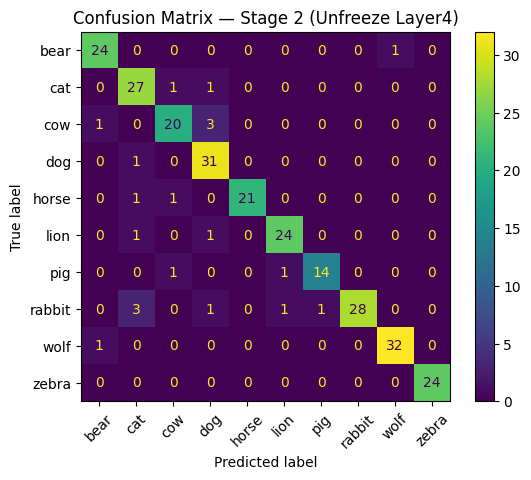

In [31]:
# 2 матрица ошибок
all_preds_2, all_labels_2 = [], []
pretrained_model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = pretrained_model(images)
        _, preds = torch.max(outputs, 1)
        all_preds_2.extend(preds.cpu().numpy())
        all_labels_2.extend(labels.numpy())

cm2 = confusion_matrix(all_labels_2, all_preds_2)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=list(labels_map.values()))
disp2.plot(xticks_rotation=45)
plt.title("Confusion Matrix — Stage 2 (Unfreeze Layer4)")
plt.show()

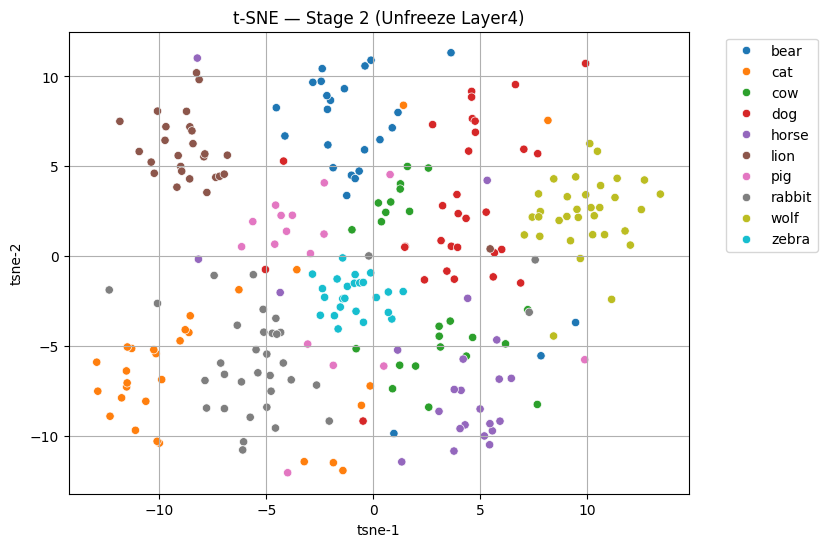

In [32]:
import torch.nn as nn

features_2, labels_2 = [], []
gap = nn.AdaptiveAvgPool2d((1, 1))  # добавим глобальный пуллинг
pretrained_model.eval()

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        feats = pretrained_model.forward_features(images)
        feats = gap(feats)  # [B, C, 1, 1]
        feats = feats.view(feats.size(0), -1)  # [B, C]
        features_2.extend(feats.cpu().numpy())
        labels_2.extend(labels.numpy())

tsne_2 = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result_2 = tsne_2.fit_transform(np.array(features_2))

df_2 = pd.DataFrame()
df_2['tsne-1'] = tsne_result_2[:, 0]
df_2['tsne-2'] = tsne_result_2[:, 1]
df_2['label'] = [labels_map[i] for i in labels_2]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='tsne-1', y='tsne-2', hue='label', data=df_2, palette='tab10')
plt.title("t-SNE — Stage 2 (Unfreeze Layer4)")
plt.legend(loc='best', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.show()

In [33]:
from PIL import Image
import torchvision.transforms as T

# Путь к изображению
image_path = "./animal_data/zebra.jpg"

# Загрузка изображения
image = Image.open(image_path).convert("RGB")

# Преобразования изображения (должны быть аналогичны используемым при обучении)
transform = T.Compose([
    T.Resize((256, 256)),  # Размер, использованный при обучении
    T.ToTensor(),  # Преобразование в тензор
    T.Normalize(mean=[mean_r, mean_g, mean_b], std=[std_r, std_g, std_b])  # Нормализация
])

# Применение преобразований
image_tensor = transform(image).unsqueeze(0)  # Добавляем batch-измерение

# Переводим модель в режим оценки
pretrained_model.eval()

# Переносим данные на устройство
image_tensor = image_tensor.to(device)

# Классификация изображения
with torch.no_grad():
    output = pretrained_model(image_tensor)
    predicted_class = output.argmax(dim=1).item()

# Вывод предсказанного класса
print(f"Предсказанный класс: {labels_map[predicted_class]}")

Предсказанный класс: zebra


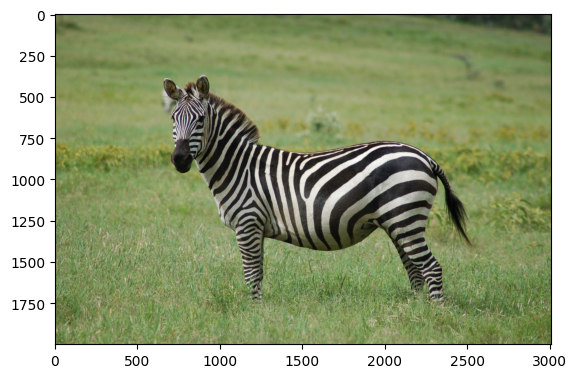

In [34]:
plt.imshow(image)

In [35]:
# Разморозим дополнительные слои: например, layer3 и layer2
for param in pretrained_model.layer3.parameters():
    param.requires_grad = True
for param in pretrained_model.layer2.parameters():
    param.requires_grad = True

# Новый оптимизатор для всех размороженных слоев
optimizer = torch.optim.SGD([
    {'params': pretrained_model.layer2.parameters(), 'lr': 1e-5},
    {'params': pretrained_model.layer3.parameters(), 'lr': 5e-5},
    {'params': pretrained_model.layer4.parameters(), 'lr': 1e-4},
    {'params': pretrained_model.fc.parameters(), 'lr': 1e-3},
], momentum=0.9)

# Новый планировщик обучения
scheduler = lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.3)

In [36]:
# Логирование потерь для 3 этапа
train_losses_3, test_losses_3 = [], []

In [37]:
# Логирование точности для 13 этапа
train_accuracies_3, test_accuracies_3 = [], []

In [38]:
# Повторный цикл обучения с расширенными слоями
for epoch in range(num_epochs):
    pretrained_model.train()
    train_loss, correct_train, total_train = 0.0, 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = pretrained_model(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct_train += (preds == labels).sum().item()
        total_train += labels.size(0)

    avg_train_loss = train_loss / len(train_loader)
    train_accuracy = correct_train / total_train

    # Тестирование
    pretrained_model.eval()
    test_loss, correct_test, total_test = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = pretrained_model(images)
            loss = loss_fn(outputs, labels)

            test_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct_test += (preds == labels).sum().item()
            total_test += labels.size(0)

    avg_test_loss = test_loss / len(test_loader)
    test_accuracy = correct_test / total_test
    scheduler.step()

    train_losses_3.append(avg_train_loss)
    test_losses_3.append(avg_test_loss)

    train_accuracies_3.append(train_accuracy)
    test_accuracies_3.append(test_accuracy)

    print(
        f"[Finetuning Epoch {epoch+1}/{num_epochs}] "
        f"Train Loss: {avg_train_loss:.4f}, Accuracy: {train_accuracy:.4f} | "
        f"Test Loss: {avg_test_loss:.4f}, Accuracy: {test_accuracy:.4f}"
    )

c:\Users\admin1\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


[Finetuning Epoch 1/10] Train Loss: 0.3996, Accuracy: 0.9067 | Test Loss: 0.3437, Accuracy: 0.8985
[Finetuning Epoch 2/10] Train Loss: 0.3895, Accuracy: 0.9039 | Test Loss: 0.3082, Accuracy: 0.9135
[Finetuning Epoch 3/10] Train Loss: 0.4068, Accuracy: 0.8888 | Test Loss: 0.3480, Accuracy: 0.9023
[Finetuning Epoch 4/10] Train Loss: 0.4188, Accuracy: 0.8803 | Test Loss: 0.2512, Accuracy: 0.9474
[Finetuning Epoch 5/10] Train Loss: 0.4441, Accuracy: 0.8746 | Test Loss: 0.2956, Accuracy: 0.9323
[Finetuning Epoch 6/10] Train Loss: 0.4532, Accuracy: 0.8803 | Test Loss: 0.2608, Accuracy: 0.9398
[Finetuning Epoch 7/10] Train Loss: 0.3978, Accuracy: 0.8869 | Test Loss: 0.3305, Accuracy: 0.9135
[Finetuning Epoch 8/10] Train Loss: 0.4254, Accuracy: 0.8812 | Test Loss: 0.2870, Accuracy: 0.9286
[Finetuning Epoch 9/10] Train Loss: 0.3928, Accuracy: 0.8926 | Test Loss: 0.2659, Accuracy: 0.9323
[Finetuning Epoch 10/10] Train Loss: 0.4118, Accuracy: 0.8869 | Test Loss: 0.3297, Accuracy: 0.9211


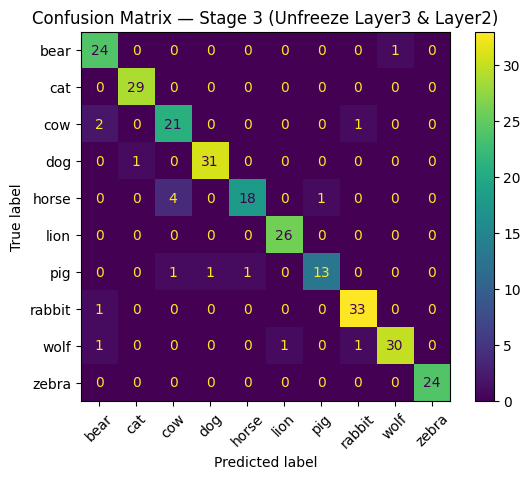

In [39]:
# 3 матрица ошибок
all_preds_3, all_labels_3 = [], []
pretrained_model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = pretrained_model(images)
        _, preds = torch.max(outputs, 1)
        all_preds_3.extend(preds.cpu().numpy())
        all_labels_3.extend(labels.numpy())

cm3 = confusion_matrix(all_labels_3, all_preds_3)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=list(labels_map.values()))
disp3.plot(xticks_rotation=45)
plt.title("Confusion Matrix — Stage 3 (Unfreeze Layer3 & Layer2)")
plt.show()

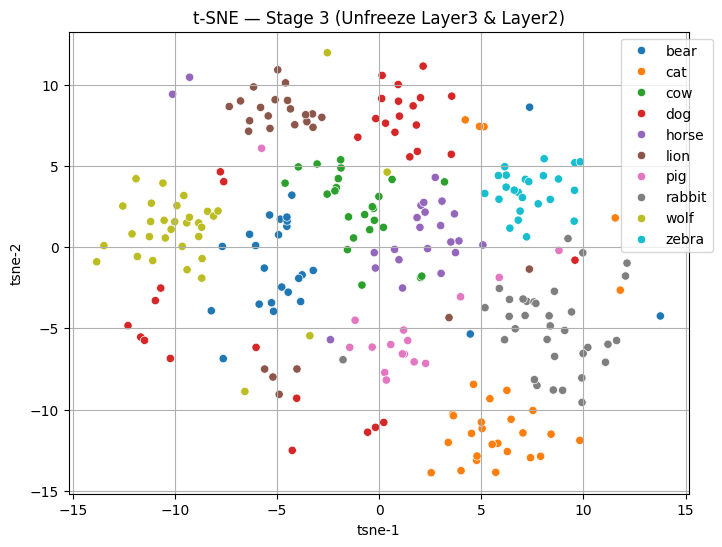

In [40]:
import torch.nn as nn

features_3, labels_3 = [], []
gap = nn.AdaptiveAvgPool2d((1, 1))  # добавим глобальный пуллинг
pretrained_model.eval()

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        feats = pretrained_model.forward_features(images)
        feats = gap(feats)  # [B, C, 1, 1]
        feats = feats.view(feats.size(0), -1)  # [B, C]
        features_3.extend(feats.cpu().numpy())
        labels_3.extend(labels.numpy())

tsne_3 = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result_3 = tsne_3.fit_transform(np.array(features_3))

df_3 = pd.DataFrame()
df_3['tsne-1'] = tsne_result_3[:, 0]
df_3['tsne-2'] = tsne_result_3[:, 1]
df_3['label'] = [labels_map[i] for i in labels_3]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='tsne-1', y='tsne-2', hue='label', data=df_3, palette='tab10')
plt.title("t-SNE — Stage 3 (Unfreeze Layer3 & Layer2)")
plt.legend(loc='best', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.show()

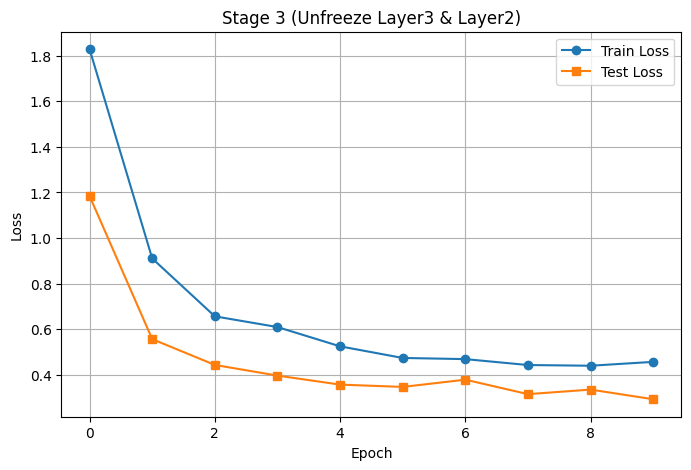

In [41]:
# Визуализация графика потерь для 3

plt.figure(figsize=(8, 5))
plt.plot(train_losses_1, label="Train Loss", marker='o')
plt.plot(test_losses_1, label="Test Loss", marker='s')
plt.title("Stage 3 (Unfreeze Layer3 & Layer2)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

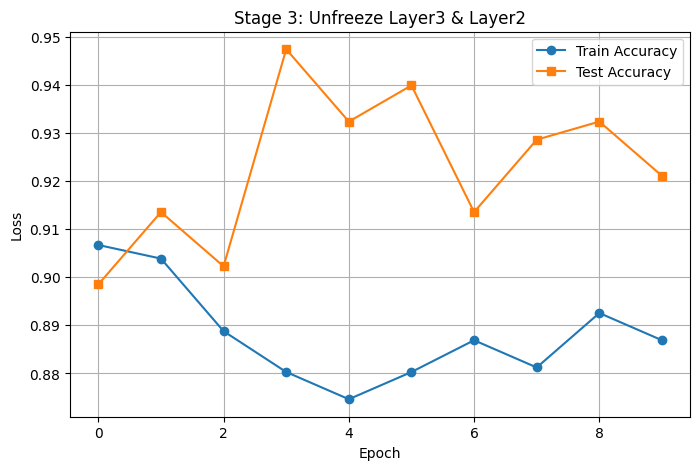

In [42]:
# Визуализация графика точности для 3

plt.figure(figsize=(8, 5))
plt.plot(train_accuracies_3, label="Train Accuracy", marker='o')
plt.plot(test_accuracies_3, label="Test Accuracy", marker='s')
plt.title("Stage 3: Unfreeze Layer3 & Layer2")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

Предсказанный класс после дообучения: zebra


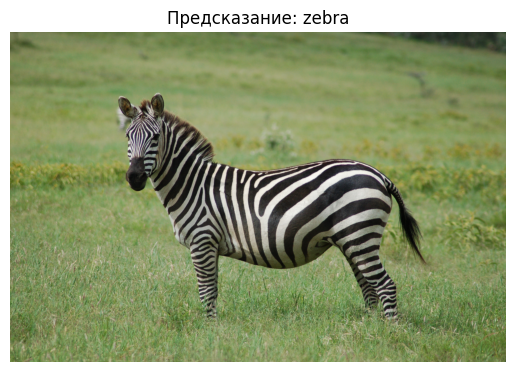

In [43]:
# Повторная классификация произвольного изображения
from PIL import Image
import torchvision.transforms as T

# Путь к изображению
image_path = "./animal_data/zebra.jpg"

# Загрузка изображения
image = Image.open(image_path).convert("RGB")

# Преобразования изображения (аналогичные обучению)
transform = T.Compose([
    T.Resize((256, 256)),
    T.ToTensor(),
    T.Normalize(mean=[mean_r, mean_g, mean_b], std=[std_r, std_g, std_b])
])

# Подготовка изображения
image_tensor = transform(image).unsqueeze(0).to(device)

# Переводим модель в режим оценки
pretrained_model.eval()

# Классификация
with torch.no_grad():
    output = pretrained_model(image_tensor)
    predicted_class = output.argmax(dim=1).item()

# Результат
print(f"Предсказанный класс после дообучения: {labels_map[predicted_class]}")
plt.imshow(image)
plt.axis("off")
plt.title(f"Предсказание: {labels_map[predicted_class]}")
plt.show()

In [44]:
print("Обучаемые слои:")
for name, param in pretrained_model.named_parameters():
    if param.requires_grad:
        print(f"{name} — обучается")

Обучаемые слои:
layer2.0.conv1.weight — обучается
layer2.0.bn1.weight — обучается
layer2.0.bn1.bias — обучается
layer2.0.conv2.weight — обучается
layer2.0.bn2.weight — обучается
layer2.0.bn2.bias — обучается
layer2.0.conv3.weight — обучается
layer2.0.bn3.weight — обучается
layer2.0.bn3.bias — обучается
layer2.0.downsample.0.weight — обучается
layer2.0.downsample.1.weight — обучается
layer2.0.downsample.1.bias — обучается
layer2.1.conv1.weight — обучается
layer2.1.bn1.weight — обучается
layer2.1.bn1.bias — обучается
layer2.1.conv2.weight — обучается
layer2.1.bn2.weight — обучается
layer2.1.bn2.bias — обучается
layer2.1.conv3.weight — обучается
layer2.1.bn3.weight — обучается
layer2.1.bn3.bias — обучается
layer2.2.conv1.weight — обучается
layer2.2.bn1.weight — обучается
layer2.2.bn1.bias — обучается
layer2.2.conv2.weight — обучается
layer2.2.bn2.weight — обучается
layer2.2.bn2.bias — обучается
layer2.2.conv3.weight — обучается
layer2.2.bn3.weight — обучается
layer2.2.bn3.bias — обучается